In [1]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import numpy as np
import itertools
from datetime import datetime
import re

# brand_lookup

In [2]:
brand_lookup = {

    "Alain Mikli" :	["AO"],
    "Armani Exchange" :	["AX"],
    "Burberry" :		["BE","JB"],
    "Chanel" :		["CH"],
    "Coach" :		["HC"],
    "Dolce & Gabbana" :		["DG"],
    "Emporio Armani" :		["EA","EK"],
    "Giorgio Armani" :		["AR","GA"],
    "Michael Kors" :		["MK"],
    "Miu Miu" :		["MU"],
    "Oakley" :		["OO","SOK" ,"FOK" ,"OX","OY" ,"OJF" ,"OK" ,"SOK", "OJ"],
    "Oliver Peoples"	 :["OV"],
    "Persol" :		["PO"],
    "Prada":		["PR", "PS"],
    "Ray-Ban":		["RB","RX","RY","RJ" ,"RW", "RJ"],
    "Starck Eyes"	:	["SH"],
    "Tiffany" :		["TF"],
    "Versace" :		["VE","VK"],
    "Vogue" :		["VO"],
    "Bvlgari" :		["BV"],
    "Polo Ralph Lauren"	 :	["PH"],
    "Swarovski"  :		["SK"],
    "Miraflex" :		["MF"],
    "Jimmy Choo"	 :	["JC"],
}

brand_lookup

{'Alain Mikli': ['AO'],
 'Armani Exchange': ['AX'],
 'Burberry': ['BE', 'JB'],
 'Chanel': ['CH'],
 'Coach': ['HC'],
 'Dolce & Gabbana': ['DG'],
 'Emporio Armani': ['EA', 'EK'],
 'Giorgio Armani': ['AR', 'GA'],
 'Michael Kors': ['MK'],
 'Miu Miu': ['MU'],
 'Oakley': ['OO', 'SOK', 'FOK', 'OX', 'OY', 'OJF', 'OK', 'SOK', 'OJ'],
 'Oliver Peoples': ['OV'],
 'Persol': ['PO'],
 'Prada': ['PR', 'PS'],
 'Ray-Ban': ['RB', 'RX', 'RY', 'RJ', 'RW', 'RJ'],
 'Starck Eyes': ['SH'],
 'Tiffany': ['TF'],
 'Versace': ['VE', 'VK'],
 'Vogue': ['VO'],
 'Bvlgari': ['BV'],
 'Polo Ralph Lauren': ['PH'],
 'Swarovski': ['SK'],
 'Miraflex': ['MF'],
 'Jimmy Choo': ['JC']}

# load data

In [3]:
test_data_df = pd.read_csv('lux_receipts.csv')
test_data_df['cleaned_brand'] = test_data_df['brand'].str.replace(r' - Optical| - Sunglasses', '', regex=True)
test_data_df.head(3)

,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,cleaned_brand
0,961573,394.0,2024-08-29,Armani Exchange - Optical,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Armani Exchange
1,961572,403.0,2024-08-23,Coach - Optical,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Coach
2,961571,420.0,2024-08-15,Oakley - Sunglasses,106570,9245,Receipt/2024/jpeg_20240904_144549.jpg,1,Oakley


# download images

In [4]:
# Base URL for images
base_url = 'https://cerrapoints.my/media/'

# Folder to save downloaded images
download_folder = 'dryice_test'
os.makedirs(download_folder, exist_ok=True)

csv_folder = os.path.join(download_folder, 'csvs')

In [5]:
# Get the top 5 rows
df_top5 = test_data_df.head(5)

# Loop through each row and download the image
for index, row in df_top5.iterrows():
    img_path = row['img']
    img_url = base_url + img_path
    img_name = os.path.basename(img_path)
    img_save_path = os.path.join(download_folder,'images', img_name)
    
    # Check if the image is already downloaded
    if os.path.exists(img_save_path):
        print(f'{index} - {img_name} already downloaded.')
    else:
        # Download and save the image
        try:
            response = requests.get(img_url, stream=True)
            response.raise_for_status()  # Check if the request was successful
            
            with open(img_save_path, 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)
            
            print(f'{index} - Downloaded {img_name} to {img_save_path}')
        except requests.RequestException as e:
            print(f'{index} - Failed to download {img_name}. Error: {e}')


0 - mmexport1725432543089.png already downloaded.
1 - jpeg_20240904_144621.jpg already downloaded.
2 - jpeg_20240904_144549.jpg already downloaded.
3 - jpeg_20240904_144505.jpg already downloaded.
4 - mmexport1725431557988.png already downloaded.


# Dataset insights

In [6]:
unique_brands = test_data_df['cleaned_brand'].unique()
unique_brands

array(['Armani Exchange', 'Coach', 'Oakley', 'Ray-Ban', 'Michael Kors',
       'Versace', 'Burberry', 'Emporio Armani', 'Prada',
       'Prada Linea Rossa', 'Tiffany & Co.', 'Miu Miu', 'Giorgio Armani',
       'Chanel', 'Swarovski', 'Vogue Eyewear', 'Oliver Peoples',
       'Polo Ralph Lauren', 'Dolce & Gabbana', 'Scuderia Ferrari'],
      dtype=object)

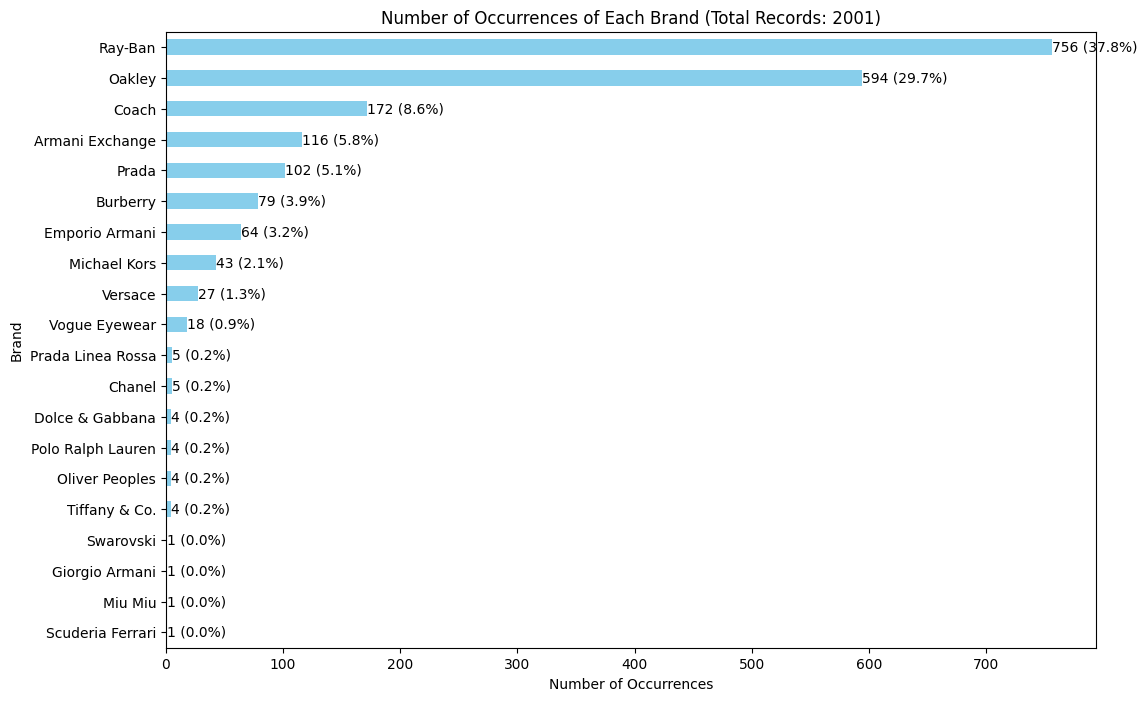

In [7]:
# graphical representation of records against each brand
# Count occurrences of each brand
brand_counts = test_data_df['cleaned_brand'].value_counts()

# Calculate the total number of records
total_records = len(test_data_df)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = brand_counts.plot(kind='barh', color='skyblue')

# Annotate the bars with the count and percentage values
for bar in bars.patches:
    width = bar.get_width()
    percentage = (width / total_records) * 100
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width)} ({percentage:.1f}%)', 
             va='center', ha='left', fontsize=10, color='black')

# Set the title with total number of records
plt.xlabel('Number of Occurrences')
plt.ylabel('Brand')
plt.title(f'Number of Occurrences of Each Brand (Total Records: {total_records})')
plt.gca().invert_yaxis()  # Optional: Invert y-axis to show the most frequent brand at the top
plt.show()

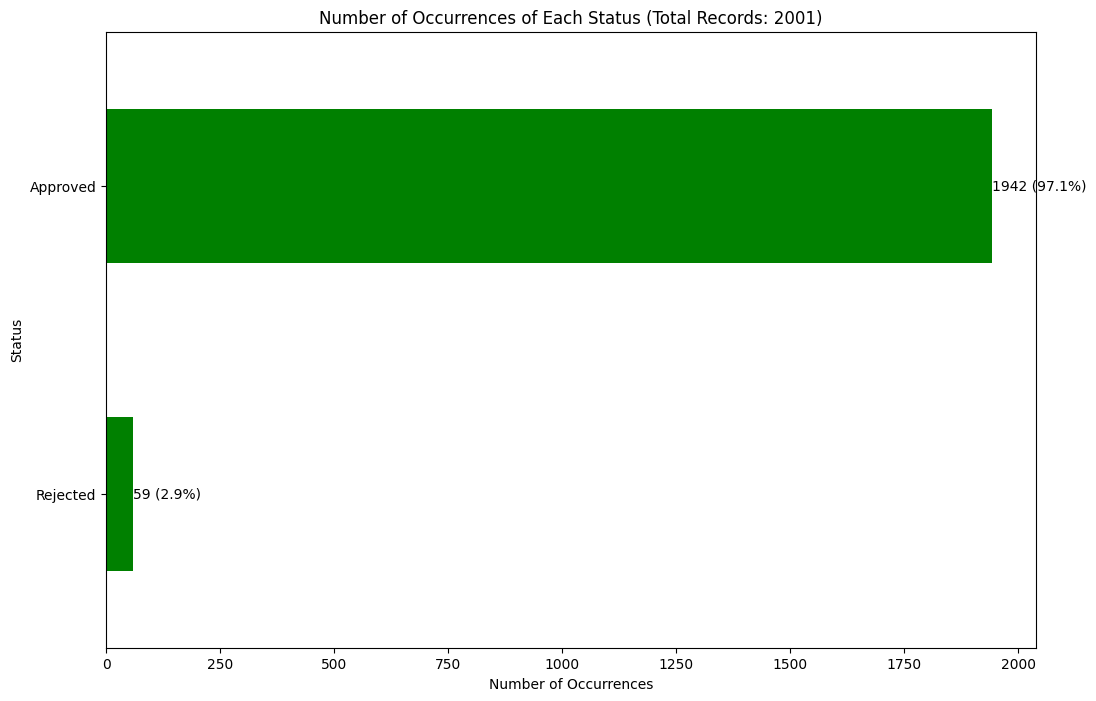

In [8]:
import matplotlib.pyplot as plt

# Map the status values to labels
status_labels = {1: 'Approved', 2: 'Rejected'}

# Create a new column with the mapped labels
test_data_df['status_label'] = test_data_df['status'].map(status_labels)

# Count occurrences of each status label
status_counts = test_data_df['status_label'].value_counts()

# Calculate the total number of records
total_records = len(test_data_df)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = status_counts.plot(kind='barh', color='green')

# Annotate the bars with the count and percentage values
for bar in bars.patches:
    width = bar.get_width()  # The count value
    percentage = (width / total_records) * 100  # Calculate percentage
    plt.text(width, bar.get_y() + bar.get_height() / 2, 
             f'{int(width)} ({percentage:.1f}%)', 
             va='center', ha='left', fontsize=10, color='black')

# Set labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Status')
plt.title(f'Number of Occurrences of Each Status (Total Records: {total_records})')

# Optionally invert y-axis to show the most frequent status at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

# data preprocessing

In [9]:
import os
import stat

updated_data_source = os.path.join(csv_folder, 'updated_data.csv')
os.makedirs(os.path.dirname(updated_data_source), exist_ok=True)

file_exists = []
just_file_names = []
file_sizes = []
top_records =  test_data_df
for index, row in top_records.iterrows():
    # print(f"<<<< row[img] = {row['img']}")
    file_path = row['img']
    file_name = os.path.basename(file_path)
    just_file_names.append(file_name)
    file_check = os.path.exists(os.path.join(download_folder, 'images', file_name))
    
    if file_check:
        file_exists.append('Yes')
        file_full_path= os.path.join(download_folder,'images', file_name)
        file_size_bytes = os.path.getsize(file_full_path)
        # Convert bytes to megabytes (1 MB = 1,000,000 bytes)
        file_size_mb = file_size_bytes / 1_000_000
        file_sizes.append(file_size_mb) 
    else:
        file_exists.append('No')
        file_sizes.append(0)  # If file doesn't exist, set size to 0.

top_records['file_exists'] = file_exists
top_records['file_name'] = just_file_names
top_records['file_size_MB'] = file_sizes
# Remove rows where file_exists is 'No'
top_records = top_records[top_records['file_exists'] != 'No']
top_records.to_csv(updated_data_source, index=False)
top_records.head(3)

,id,amount,date_of_receipt,brand,receipt_number,brand_model,img,status,cleaned_brand,status_label,file_exists,file_name,file_size_MB
0,961573,394.0,2024-08-29,Armani Exchange - Optical,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Armani Exchange,Approved,Yes,mmexport1725432543089.png,0.048774
1,961572,403.0,2024-08-23,Coach - Optical,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Coach,Approved,Yes,jpeg_20240904_144621.jpg,0.265176
2,961571,420.0,2024-08-15,Oakley - Sunglasses,106570,9245,Receipt/2024/jpeg_20240904_144549.jpg,1,Oakley,Approved,Yes,jpeg_20240904_144549.jpg,0.268750


# fetch/resize data

In [10]:
# fetch data

import boto3
import base64
import json
import sqlite3
from sqlite3 import Error
import os
from PIL import Image

# Function to initialize SQLite database and table
import sqlite3
from sqlite3 import Error

def create_sqlite_connection(db_file):
    """Create a database connection to an SQLite database and create or alter a table if necessary."""
    print(f'<<<< sqlite: db_file = {db_file}')
    conn = None
    try:
        # Ensure the directory exists
        os.makedirs(os.path.dirname(db_file), exist_ok=True)
        # Connect to the SQLite database
        conn = sqlite3.connect(db_file)
        cursor = conn.cursor()
        
        # Create table if it doesn't exist
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS textract_responses (
                image_file_name TEXT PRIMARY KEY,
                response TEXT NOT NULL
            );
        ''')
        
        # Check if the new column exists
        cursor.execute("PRAGMA table_info(textract_responses);")
        columns = [info[1] for info in cursor.fetchall()]
        
        # Add the new column if it doesn't exist
        if 'analyse_document_response' not in columns:
            cursor.execute('''
                ALTER TABLE textract_responses
                ADD COLUMN analyse_document_response TEXT;
            ''')
        
        # Commit the changes
        conn.commit()
        
        return conn
    except Error as e:
        print(e)
    
    return conn

import os
from PIL import Image
import piexif
import pandas as pd

def resize_image_if_needed(image_path, max_size_mb=5):
    # Save resized image to resized_folder with EXIF data
    resized_folder = os.path.join(download_folder, 'resized_folder') 
    os.makedirs(resized_folder, exist_ok=True)
    resized_image_path = os.path.join(resized_folder, os.path.basename(image_path))

    if os.path.exists(resized_image_path):
        return resized_image_path
    # Check file size
    file_size_mb = os.path.getsize(image_path) / (1024 * 1024)
    
    if file_size_mb <= max_size_mb:
        # No resizing needed, return original path
        return image_path
    
    print(f'<<<<<<< resizing image {image_path}')
    # Calculate resize ratio
    resize_ratio = (max_size_mb * 1024 * 1024) / os.path.getsize(image_path)
    img = Image.open(image_path)
    
    # Extract EXIF data
    exif_data = img.info.get('exif')

    new_width = int(img.width * resize_ratio)
    new_height = int(img.height * resize_ratio)
    
    # Resize image with anti-aliasing
    resized_image = img.resize((new_width, new_height), Image.LANCZOS)
    
    
    
    if exif_data:
        resized_image.save(resized_image_path, exif=exif_data)
    else:
        resized_image.save(resized_image_path)
    
    return resized_image_path


# Function to fetch OCR data
def fetch_ocr_data(file_name, image_path, force_api_call=False):
    print(f'<<<<<< fetch_ocr_data = {image_path}')
    
    # Resize image if needed and get the path to resized image
    resized_image_path = resize_image_if_needed(image_path)
    
    # Read the resized image file in binary mode
    with open(resized_image_path, 'rb') as image_file:
        # Encode the image to base64
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

    # Initialize SQLite connection and cursor
    db_file = os.path.join(download_folder, 'db', 'textract_responses.db')
    conn = create_sqlite_connection(db_file)
    cursor = conn.cursor()

    # Check if response exists in SQLite before calling Textract
    image_file_name = os.path.basename(resized_image_path)
    cursor.execute("SELECT analyse_document_response FROM textract_responses WHERE image_file_name=?", (image_file_name,))
    row = cursor.fetchone()
    # print(f'row = {row}')
    # data = pd.read_csv('merged.csv')
    # data = data[data['file_name'] == file_name]
    
    # fetched_receipt_date = data['m_receipt_date'].iloc[0]
    # print(f'~~~~~~~ fetched_receipt_date = {fetched_receipt_date}')
    # if fetched_receipt_date == '[]' :
    #     print('~~~~~~~~~~ refetch date using query')
    #     # force_api_call = True
    
    if row and row[0] != None and not force_api_call:
        # If response exists in database, use it directly
        response_json = row[0]
        with open('resp.json', 'w') as file:
            response_dict = json.loads(response_json)
            json.dump(response_dict, file, indent=4)
        response = json.loads(response_json)
        print(f"Found existing response in SQLite: {image_file_name}")
    else:
        # Call Textract to analyze the document
        boto_client = boto3.client('textract')
        file_content = base64.b64decode(encoded_image)
        response = boto_client.analyze_document(
            Document={'Bytes': file_content}, 
            FeatureTypes=["TABLES", "FORMS", "QUERIES"],
            QueriesConfig = { 
                "Queries": [ 
                        { 
                            "Alias": "Date",
                            "Text": "Date"
                        },
                        { 
                            "Alias": "Order Date",
                            "Text": "Order Date"
                        }
                         ]
                }
        )

        # Store the response in SQLite (insert or replace)
        response_json = json.dumps(response)
        cursor.execute("REPLACE INTO textract_responses (image_file_name, response, analyse_document_response) VALUES (?, ?, ? )",
                       (image_file_name, 'NA', response_json))
        conn.commit()
        with open('resp.json', 'w') as file:
            response_dict = json.loads(response_json)
            json.dump(response_json, file)
        print(f"Response saved in SQLite: {image_file_name}")

    # Close SQLite connection
    conn.close()
    
    return response

# main code

In [11]:
class Block:
    def __init__(self, block_data):
        self.id = block_data.get("Id", "")
        self.block_type = block_data.get("BlockType", "")
        self.text = block_data.get("Text", "")  # Keep original text as-is
        self.normalized_text = self.text.lower()  # Normalize text for comparison
        self.geometry = block_data.get("Geometry", {})
        # self.relationships = block_data.get("Relationships", [])

    def to_dict(self):
        # Create a copy of the geometry and remove the Polygon key if it exists
        filtered_geometry = {k: v for k, v in self.geometry.items() if k != "Polygon"}

        return {
            "Id": self.id,
            "BlockType": self.block_type,
            "Text": self.text,
            "normalized_text": self.normalized_text,
            "Geometry": filtered_geometry,
            # "relationships": self.relationships,
        }

    def __str__(self) -> str:
        return self.text

    # def get_bounding_box(self, image_width, image_height):
    #     bounding_box = self.geometry.get("BoundingBox", {})
    #     # image_width = 800  # Example image width (replace with actual image width)
    #     # image_height = 600  # Example image height (replace with actual image height)

    #     left = bounding_box.get("Left", 0.0) * image_width
    #     top = bounding_box.get("Top", 0.0) * image_height
    #     width = bounding_box.get("Width", 0.0) * image_width
    #     height = bounding_box.get("Height", 0.0) * image_height

    #     return left, top, width, height

In [20]:
def generate_date_formats(date_str: str, input_format: str = "%Y/%m/%d") -> list:
    """Generate all possible date formats based on an input date."""
    try:
        date = datetime.strptime(date_str, input_format)

        # Year, month, and day variants
        year_variants = [date.strftime("%Y"), date.strftime("%y")]
        month_variants = [
            date.strftime("%m"),
            date.strftime("%b"),
            date.strftime("%B"),
            f"{int(date.strftime('%m'))}",  # Strip leading zeros
        ]
        day_variants = [date.strftime("%d"), f"{int(date.strftime('%d'))}"]

        # Common separators
        separators = ["-", "/", ".", " ", ","]

        # Generate all combinations
        possible_dates = set()
        for year, month, day in itertools.product(
            year_variants, month_variants, day_variants
        ):
            for sep1, sep2 in itertools.product(separators, repeat=2):
                possible_dates.update(
                    [
                        f"{year}{sep1}{month}{sep2}{day}",  # Y-M-D
                        f"{day}{sep1}{month}{sep2}{year}",  # D-M-Y
                        f"{month}{sep1}{day}{sep2}{year}",  # M-D-Y
                    ]
                )

        return sorted(possible_dates)

    except ValueError as e:
        print(f"Error generating date formats for '{date_str}': {e}")
        return []
    
def get_model_code(s):
    match = re.match(r"([a-zA-Z]+)(\d+)(.*)", s)
    if match:
        # Combine the second and third groups
        combined = match.group(2) + match.group(3)
        return  [match.group(1)[:2] if len(match.group(1)) >= 2 else match.group(1), combined]
    else:
        return None
   

def find_brand_user_input(user_input):
    brand_lookup = {
        "Alain Mikli": ["Alain Mikli"],
        "Armani Exchange": ["Armani Exchange"],
        "Burberry": ["Burberry", "Burberry Junior"],
        "Chanel": ["Chanel"],
        "Coach": ["Coach"],
        "Dolce & Gabbana": ["Dolce & Gabbana"],
        "Emporio Armani": ["Emporio Armani", "Emporio Armani Kids"],
        "Giorgio Armani": ["Giorgio Armani"],
        "Michael Kors": ["Michael Kors"],
        "Miu Miu": ["Miu Miu"],
        "Oakley": ["Oakley", "Oakley Kids",],
        "Oliver Peoples": ["Oliver Peoples",],
        "Persol": ["Persol"],
        "Prada": ["Prada", "Prada Linea Rossa"],
        "Ray-Ban": ["Ray-Ban",],
        "Starck Eyes": ["Starck Eyes"],
        "Tiffany": ["Tiffany & Co."],
        "Versace": ["Versace", "Versace Kids", ],
        "Vogue": ["Vogue Eyewear", "Vogue"],
        "Bvlgari": ["Bvlgari"],
        "Polo Ralph Lauren": ["Polo Ralph Lauren"],
        "Swarovski": ["Swarovski "],
        "Miraflex": ["Miraflex"],
        "Jimmy Choo": ["Jimmy Choo"],
    }

    for brand, codes in brand_lookup.items():
        if user_input in codes:
            return brand
    return None

def find_brand_by_code(code):
    brand_lookup = {
        "Alain Mikli": ["AO"],
        "Armani Exchange": ["AX"],
        "Burberry": ["BE", "JB"],
        "Chanel": ["CH"],
        "Coach": ["HC"],
        "Dolce & Gabbana": ["DG"],
        "Emporio Armani": ["EA", "EK"],
        "Giorgio Armani": ["AR", "GA"],
        "Michael Kors": ["MK"],
        "Miu Miu": ["MU"],
        "Oakley": ["OO", "SOK", "FOK", "OX", "OY", "OJF", "OK", "SOK", "OJ"],
        "Oliver Peoples": ["OV"],
        "Persol": ["PO"],
        "Prada": ["PR", "PS"],
        "Ray-Ban": ["RB", "RX", "RY", "RJ", "RW", "RJ"],
        "Starck Eyes": ["SH"],
        "Tiffany & Co.": ["TF"],
        "Versace": ["VE", "VK"],
        "Vogue": ["VO"],
        "Bvlgari": ["BV"],
        "Polo Ralph Lauren": ["PH"],
        "Swarovski": ["SK"],
        "Miraflex": ["MF"],
        "Jimmy Choo": ["JC"],
    }

    for brand, codes in brand_lookup.items():
        if code in codes:
            return brand
    return None

In [87]:
from typing import Dict, List



class ReceiptValidator:
    def validate(self) -> bool:
        raise NotImplementedError("Subclasses should implement this method.")


class LuxotticaReceiptValidator(ReceiptValidator):
    def __init__(self, user_input_dict: Dict, response: Dict) -> None:
        self.user_input_dict = user_input_dict
        self.blocks = [Block(block_data) for block_data in response["Blocks"]]
        self.user_entered_date_variations = generate_date_formats(
            user_input_dict["receipt_date"],
            input_format="%d/%m/%y",
        )

    def _normalize_text(self, text: str) -> str:
        """Normalize text by removing spaces, dashes, and converting to lowercase."""
        return text.replace(" ", "").replace("-", "").replace("/", "").lower()

    def _get_matching_blocks(
        self, normalized_value: str, block_types: List[str]
    ) -> List[Block]:
        """Return blocks where the normalized text matches the provided value."""
        return [
            block
            for block in self.blocks
            if block.block_type in block_types
            and normalized_value in self._normalize_text(block.normalized_text)
        ]

    def _validate_field(self, field_key: str, block_types: List[str]) -> List[Block]:
        """Generic validation method for fields like receipt number, brand model, etc."""
        normalized_field_value = self._normalize_text(self.user_input_dict[field_key])
        return self._get_matching_blocks(normalized_field_value, block_types)

    # Validate receipt number
    def validate_receipt_number(self) -> List[Block]:
        return self._validate_field("receipt_number", ["LINE", "WORD"])

    # Validate receipt date
    def validate_date(self) -> List[Block]:
        return [
            block
            for block in self.blocks
            if block.block_type in ["LINE", "WORD", "QUERY_RESULT"]
            and any(
                variation in block.text.replace(", ", ",").replace("/ ", "/")
                for variation in self.user_entered_date_variations
            )
        ]

    # Clean up brand input
    def clean_up_user_input_brand(self, text: str) -> str:
        return text.replace("- Sunglasses", "").replace("- Optical", "").strip()

    # Validate brand
    def validate_brand(self, validated_brand_model_blocks: List[Block]) -> List[Block]:
        """Validate the brand by comparing the user input and checking for matches."""
        # Clean and normalize the user input brand
        user_input_brand = self.clean_up_user_input_brand(self.user_input_dict["brand"])
        brand = find_brand_user_input(user_input_brand)

        if brand:
            normalized_user_input_brand = self._normalize_text(brand)

            # Find matching blocks for the normalized user input brand
            matching_blocks = self._get_matching_blocks(normalized_user_input_brand, ["LINE", "WORD"])

            # If no matching blocks are found and there are validated brand model blocks, check for model-based brand codes
            if not matching_blocks and validated_brand_model_blocks:
                for model_block in validated_brand_model_blocks:
                    model_code_splits = get_model_code(model_block.text)
                    
                    # Ensure that model_code_splits is not empty or None
                    if model_code_splits:
                        brand_code = model_code_splits[0].upper()
                        brand_from_code = find_brand_by_code(brand_code)

                        # If a brand is found via the brand code and it matches the user input brand, return the model block
                        if brand_from_code and self._normalize_text(brand_from_code) == normalized_user_input_brand:
                            return [model_block]

            return matching_blocks
        else:
            return []
        
    # Validate brand models
    def validate_brand_models(self) -> List[Block]:
        return self._validate_field("brand_model", ["LINE", "WORD"])

    # Validate all fields and return results
    def validate(self) -> Dict:
        validated_brands = self.validate_brand_models()
        result = {
            "receipt_date": {
                "user_input": self.user_input_dict["receipt_date"],
                "detected": [block.to_dict() for block in self.validate_date()],
            },
            "receipt_number": {
                "user_input": self.user_input_dict["receipt_number"],
                "detected": [block.to_dict() for block in self.validate_receipt_number()],
            },
            "brand_model": {
                "user_input": self.user_input_dict["brand_model"],
                "detected": [block.to_dict() for block in validated_brands],
            },
            "brand": {
                "user_input": self.user_input_dict["brand"],
                "detected": [
                    block.to_dict() for block in self.validate_brand(validated_brands)
                ],
            },
        }

        # Determine AI_APPROVED_STATUS
        result["AI_APPROVED_STATUS"] = {
            "detected": "Approved" if all(result[key]["detected"] for key in result if key != "AI_APPROVED_STATUS") else "Rejected"
        }

        return result


# Inference for single image

In [26]:
#diplay image and bounding box
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image, ExifTags

def get_exif_orientation(image_path):
    try:
        image = Image.open(image_path)
        exif_data = image._getexif()
        if exif_data:
            orientation = exif_data.get(274, 1)
            return orientation
    except Exception as e:
        print(f"Error reading EXIF data: {e}")
    return 1  # default orientation if no EXIF data or error

def rotate_image(image, orientation):
    if orientation == 1:
        return image
    elif orientation == 3:
        return image.transpose(Image.ROTATE_180)
    elif orientation == 6:
        return image.transpose(Image.ROTATE_270)
    elif orientation == 8:
        return image.transpose(Image.ROTATE_90)
    return image

def display_blocks_on_image(image_path, blocks, should_rotate = True):
    # Load and rotate image based on EXIF orientation
    orientation = get_exif_orientation(image_path)
    image = Image.open(image_path)
    if should_rotate:
        rotated_image = rotate_image(image, orientation)
    else:
       rotated_image =  image #rotate_image(image, orientation) 
    
    # Convert rotated image to numpy array for matplotlib
    image_array = rotated_image.copy()
    
    # Display image
    plt.figure(figsize=(10, 8))
    plt.imshow(image_array)
    plt.axis('off')
    
    # Iterate over blocks and draw rectangles
    for block in blocks:
        left, top, width, height = block.get_bounding_box(rotated_image.width, rotated_image.height)
        rect = Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
    
    plt.show()

In [79]:
import os
file_name = '1ajw6ujlqu_nExcnR2.jpg'
# file_name = 'jpeg_20240902_134349.jpg'
file_path = os.path.join(download_folder,'images', file_name)
response = fetch_ocr_data(file_name, file_path, force_api_call=False)


<<<<<< fetch_ocr_data = dryice_test/images/1ajw6ujlqu_nExcnR2.jpg
<<<< sqlite: db_file = dryice_test/db/textract_responses.db
Found existing response in SQLite: 1ajw6ujlqu_nExcnR2.jpg


In [80]:
import pandas as pd
data = pd.read_csv(os.path.join(updated_data_source))
single_data = data[data['file_name'] == file_name]
single_data.rename(columns={'date_of_receipt': 'receipt_date'}, inplace=True)
# Select the columns 'A' and 'C'
selected_columns = ['receipt_date','receipt_number', 'brand', 'brand_model']
user_input_dict = single_data[selected_columns].iloc[0].to_dict()
# result_dict['brand_model'] = 'SP009289'
user_input_dict['receipt_date'] = datetime.strptime(user_input_dict['receipt_date'], '%Y-%m-%d').strftime('%d/%m/%y')
user_input_dict

/var/folders/2d/pvchbzgd1s7c2jy60p9lpbn00000gn/T/ipykernel_40038/3491250727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_data.rename(columns={'date_of_receipt': 'receipt_date'}, inplace=True)


{'receipt_date': '04/07/24',
 'receipt_number': 'EE124-627-DM',
 'brand': 'Ray-Ban - Sunglasses',
 'brand_model': 'rb72'}

In [81]:
result = LuxotticaReceiptValidator(user_input_dict, response).validate()
# print(result['brand'])
result.items()
boxes = []
for key, ele in result.items():
    if isinstance(ele['detected'], List):
        print(f"{key} | user_input: {ele.get('user_input', None)} | block:  {[str(Block(block)) for block in ele['detected']]}")
        for block in ele['detected']:
            boxes.append(Block(block))
    else:
         print(f"{key}  | {ele['detected']}")
print(len(boxes))

receipt_date | user_input: 04/07/24 | block:  [': 2024-07-04', '2024-07-04', '2024-07-04']
receipt_number | user_input: EE124-627-DM | block:  ['Sales No. : EE124-627-DM', 'EE124-627-DM']
brand_model | user_input: rb72 | block:  ['rb7232', 'rb7232']
brand | user_input: Ray-Ban - Sunglasses | block:  ['rb7232']
AI_APPROVED_STATUS  | Approved
8


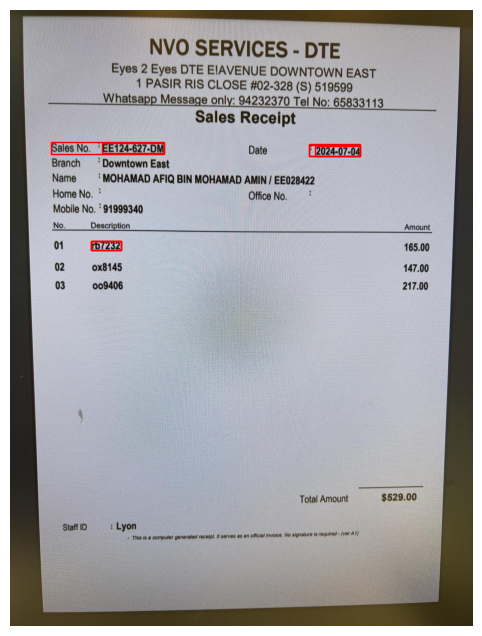

In [82]:
display_blocks_on_image(
    file_path, 
    boxes,
    True
    )

# run test on complete dataset

In [85]:
updated_data = pd.read_csv(updated_data_source)
updated_data = updated_data#.head(500)
updated_data.rename(columns={'date_of_receipt': 'receipt_date'}, inplace=True)
updated_data["receipt_date"] = pd.to_datetime(updated_data['receipt_date']).dt.strftime('%d/%m/%y')
# data = data[data['file_name'] == file_name]
# updated_data = updated_data[updated_data['file_name'] == file_name]
updated_data

,id,amount,receipt_date,brand,receipt_number,brand_model,img,status,cleaned_brand,status_label,file_exists,file_name,file_size_MB
0,961573,394.0,29/08/24,Armani Exchange - Optical,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Armani Exchange,Approved,Yes,mmexport1725432543089.png,0.048774
1,961572,403.0,23/08/24,Coach - Optical,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Coach,Approved,Yes,jpeg_20240904_144621.jpg,0.265176
2,961571,420.0,15/08/24,Oakley - Sunglasses,106570,9245,Receipt/2024/jpeg_20240904_144549.jpg,1,Oakley,Approved,Yes,jpeg_20240904_144549.jpg,0.268750
3,961570,0.0,04/09/24,Coach - Sunglasses,104751,8371,Receipt/2024/jpeg_20240904_144505.jpg,1,Coach,Approved,Yes,jpeg_20240904_144505.jpg,0.343383
4,961569,629.0,31/08/24,Ray-Ban - Sunglasses,OR004770,ORB2140F,Receipt/2024/mmexport1725431557988.png,1,Ray-Ban,Approved,Yes,mmexport1725431557988.png,0.057045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,959555,0.0,31/08/24,Ray-Ban - Sunglasses,S115701105503,3825,Receipt/2024/jpeg_20240902_105739.jpg,1,Ray-Ban,Approved,Yes,jpeg_20240902_105739.jpg,0.610140
1997,959554,0.0,31/08/24,Ray-Ban - Sunglasses,17907966,4391d-645087-56,Receipt/2024/cmahjoywpx.jpg,1,Ray-Ban,Approved,Yes,cmahjoywpx.jpg,3.597690
1998,959553,0.0,30/08/24,Coach - Sunglasses,S115701105486,8395,Receipt/2024/jpeg_20240902_105620.jpg,1,Coach,Approved,Yes,jpeg_20240902_105620.jpg,0.690908
1999,959552,0.0,31/08/24,Oakley - Sunglasses,17907961,oo9417-16-59,Receipt/2024/2s1gwxlmey.jpg,1,Oakley,Approved,Yes,2s1gwxlmey.jpg,3.340408


In [88]:
processed_data_source = os.path.join(csv_folder, 'processed_data_without_sop.csv')
os.makedirs(os.path.dirname(processed_data_source), exist_ok=True)

processed_responses = []
for index, row in updated_data.iterrows():
    t_file_name = row['file_name'] 
    print(f'********* processing = {index} - {t_file_name}')
    t_result_dict = {}
    response = fetch_ocr_data(t_file_name, os.path.join(download_folder, 'images',t_file_name))
    selected_columns = ['receipt_date', 'receipt_number', 'brand', 'brand_model']
    filtered_data = updated_data[updated_data['file_name'] == t_file_name]
    user_input_dict = filtered_data[selected_columns].iloc[0].to_dict()
    print(f'@@@@@@ user_input_dict = {user_input_dict}')
    # result = find_blocks(result_dict, response)
    result = LuxotticaReceiptValidator(user_input_dict, response).validate()
    for key, ele in result.items():
        if isinstance(ele['detected'], List):
            print(f"{key} | user_input: {ele.get('user_input', None)} | block:  {[str(Block(block)) for block in ele['detected']]}")
            texts = []
            for block in ele['detected']:
                texts.append(Block(block).text)
                # boxes.append()
            t_result_dict[f'm_{key}'] =  texts
        else:
            print(f"{key}  | {ele['detected']}")
            t_result_dict[f'm_{key}'] =  ele['detected']

    # result = validate_inputs(result_dict, response, False)
    # for key in result.keys():
    #     texts = []
    #     for block in result[key]:
    #         texts.append(block.text)
    #     t_result_dict[f'm_{key}'] =  texts
    #     # print(f'result_dict = {t_result_dict}')
    t_result_dict['id'] = row['id']
    processed_responses.append(t_result_dict)
updated_data['processed_data'] = processed_responses
# updated_data.to_csv(processed_data_source, index=False)
updated_data
# len(processed_responses)

********* processing = 0 - mmexport1725432543089.png
<<<<<< fetch_ocr_data = dryice_test/images/mmexport1725432543089.png
<<<< sqlite: db_file = dryice_test/db/textract_responses.db
Found existing response in SQLite: mmexport1725432543089.png
@@@@@@ user_input_dict = {'receipt_date': '29/08/24', 'receipt_number': 'OR000811', 'brand': 'Armani Exchange - Optical', 'brand_model': 'OAX1064'}
receipt_date | user_input: 29/08/24 | block:  ['29/08/2024', '29/08/2024', 'Created on 29/08/2024 03:57:06 PM', '29/08/2024', '29/08/2024', '29/08/2024', '29/08/2024', '29/08/2024']
receipt_number | user_input: OR000811 | block:  ['OR000811', 'OR000811']
brand_model | user_input: OAX1064 | block:  []
brand | user_input: Armani Exchange - Optical | block:  ['1 ARMANI EXCHANGE']
AI_APPROVED_STATUS  | Rejected
********* processing = 1 - jpeg_20240904_144621.jpg
<<<<<< fetch_ocr_data = dryice_test/images/jpeg_20240904_144621.jpg
<<<< sqlite: db_file = dryice_test/db/textract_responses.db
Found existing res

,id,amount,receipt_date,brand,receipt_number,brand_model,img,status,cleaned_brand,status_label,file_exists,file_name,file_size_MB,processed_data
0,961573,394.0,29/08/24,Armani Exchange - Optical,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Armani Exchange,Approved,Yes,mmexport1725432543089.png,0.048774,"{'m_receipt_date': ['29/08/2024', '29/08/2024'..."
1,961572,403.0,23/08/24,Coach - Optical,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Coach,Approved,Yes,jpeg_20240904_144621.jpg,0.265176,{'m_receipt_date': [': 23/08/2024 03:58:58 PM'...
2,961571,420.0,15/08/24,Oakley - Sunglasses,106570,9245,Receipt/2024/jpeg_20240904_144549.jpg,1,Oakley,Approved,Yes,jpeg_20240904_144549.jpg,0.268750,{'m_receipt_date': [': 15/08/2024 11:37:23 AM'...
3,961570,0.0,04/09/24,Coach - Sunglasses,104751,8371,Receipt/2024/jpeg_20240904_144505.jpg,1,Coach,Approved,Yes,jpeg_20240904_144505.jpg,0.343383,{'m_receipt_date': [': 04/09/2024 01:43:17 PM'...
4,961569,629.0,31/08/24,Ray-Ban - Sunglasses,OR004770,ORB2140F,Receipt/2024/mmexport1725431557988.png,1,Ray-Ban,Approved,Yes,mmexport1725431557988.png,0.057045,"{'m_receipt_date': ['31/08/2024', '31/08/2024'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,959555,0.0,31/08/24,Ray-Ban - Sunglasses,S115701105503,3825,Receipt/2024/jpeg_20240902_105739.jpg,1,Ray-Ban,Approved,Yes,jpeg_20240902_105739.jpg,0.610140,"{'m_receipt_date': ['31/08/2024 07:01:39 PM', ..."
1997,959554,0.0,31/08/24,Ray-Ban - Sunglasses,17907966,4391d-645087-56,Receipt/2024/cmahjoywpx.jpg,1,Ray-Ban,Approved,Yes,cmahjoywpx.jpg,3.597690,"{'m_receipt_date': [': 31/08/2024', '31/08/202..."
1998,959553,0.0,30/08/24,Coach - Sunglasses,S115701105486,8395,Receipt/2024/jpeg_20240902_105620.jpg,1,Coach,Approved,Yes,jpeg_20240902_105620.jpg,0.690908,"{'m_receipt_date': ['30/08/2024 05:23:12 PM', ..."
1999,959552,0.0,31/08/24,Oakley - Sunglasses,17907961,oo9417-16-59,Receipt/2024/2s1gwxlmey.jpg,1,Oakley,Approved,Yes,2s1gwxlmey.jpg,3.340408,"{'m_receipt_date': [': 31/08/2024', '31/08/202..."


In [89]:
processed_df = pd.DataFrame(processed_responses)
processed_df

,m_receipt_date,m_receipt_number,m_brand_model,m_brand,m_AI_APPROVED_STATUS,id
0,"[29/08/2024, 29/08/2024, Created on 29/08/2024...","[OR000811, OR000811]",[],[1 ARMANI EXCHANGE],Rejected,961573
1,"[: 23/08/2024 03:58:58 PM, 23/08/2024, 23/08/2...","[S118501106700, S118501106700]",[],"[FF COACH, COACH]",Rejected,961572
2,"[: 15/08/2024 11:37:23 AM, 15/08/2024, 15/08/2...","[S118501106570, S118501106570]","[SG 9245, 9245]","[FS OAKLEY, OAKLEY]",Approved,961571
3,"[: 04/09/2024 01:43:17 PM, 04/09/2024, 04/09/2...","[S122001104751, S122001104751]","[COASP8371U157458754, COASP8371U157458754]","[FS COACH, COACH]",Approved,961570
4,"[31/08/2024, 31/08/2024, Created on 31/08/2024...","[OR004770, OR004770]",[],"[1 RAYBAN, RAYBAN]",Rejected,961569
...,...,...,...,...,...,...
1996,"[31/08/2024 07:01:39 PM, : 31/08/2024 07:01:10...","[S115701105503, S115701105503]","[RAYSP382510015862, RAYSP382510015862]",[FS RAY BAN],Approved,959555
1997,"[: 31/08/2024, 31/08/2024, 31/08/2024, 31/08/2...","[: 17907966, 17907966]",[],"[RAYBAN, RAYBAN CASING, RAYBAN, RAYBAN]",Rejected,959554
1998,"[30/08/2024 05:23:12 PM, : 30/08/2024 04:28:37...","[S115701105486, S115701105486]","[COASP8395F158139056, COASP8395F158139056]","[FS COACH, COACH]",Approved,959553
1999,"[: 31/08/2024, 31/08/2024, : 31/08/2024]","[: 17907961, 17907961]",[],"[OAKLEY CASING, OAKLEY]",Rejected,959552


In [90]:
merged_datasource_path = os.path.join(csv_folder, 'merged_without_sop.csv')
os.makedirs(os.path.dirname(processed_data_source), exist_ok=True)

merged_data = pd.merge(updated_data, processed_df, on='id', how='inner') #pd.concat([, processed_df])
merged_data.to_csv(merged_datasource_path)
merged_data

,id,amount,receipt_date,brand,receipt_number,brand_model,img,status,cleaned_brand,status_label,file_exists,file_name,file_size_MB,processed_data,m_receipt_date,m_receipt_number,m_brand_model,m_brand,m_AI_APPROVED_STATUS
0,961573,394.0,29/08/24,Armani Exchange - Optical,OR000811,OAX1064,Receipt/2024/mmexport1725432543089.png,1,Armani Exchange,Approved,Yes,mmexport1725432543089.png,0.048774,"{'m_receipt_date': ['29/08/2024', '29/08/2024'...","[29/08/2024, 29/08/2024, Created on 29/08/2024...","[OR000811, OR000811]",[],[1 ARMANI EXCHANGE],Rejected
1,961572,403.0,23/08/24,Coach - Optical,106700,6215D,Receipt/2024/jpeg_20240904_144621.jpg,1,Coach,Approved,Yes,jpeg_20240904_144621.jpg,0.265176,{'m_receipt_date': [': 23/08/2024 03:58:58 PM'...,"[: 23/08/2024 03:58:58 PM, 23/08/2024, 23/08/2...","[S118501106700, S118501106700]",[],"[FF COACH, COACH]",Rejected
2,961571,420.0,15/08/24,Oakley - Sunglasses,106570,9245,Receipt/2024/jpeg_20240904_144549.jpg,1,Oakley,Approved,Yes,jpeg_20240904_144549.jpg,0.268750,{'m_receipt_date': [': 15/08/2024 11:37:23 AM'...,"[: 15/08/2024 11:37:23 AM, 15/08/2024, 15/08/2...","[S118501106570, S118501106570]","[SG 9245, 9245]","[FS OAKLEY, OAKLEY]",Approved
3,961570,0.0,04/09/24,Coach - Sunglasses,104751,8371,Receipt/2024/jpeg_20240904_144505.jpg,1,Coach,Approved,Yes,jpeg_20240904_144505.jpg,0.343383,{'m_receipt_date': [': 04/09/2024 01:43:17 PM'...,"[: 04/09/2024 01:43:17 PM, 04/09/2024, 04/09/2...","[S122001104751, S122001104751]","[COASP8371U157458754, COASP8371U157458754]","[FS COACH, COACH]",Approved
4,961569,629.0,31/08/24,Ray-Ban - Sunglasses,OR004770,ORB2140F,Receipt/2024/mmexport1725431557988.png,1,Ray-Ban,Approved,Yes,mmexport1725431557988.png,0.057045,"{'m_receipt_date': ['31/08/2024', '31/08/2024'...","[31/08/2024, 31/08/2024, Created on 31/08/2024...","[OR004770, OR004770]",[],"[1 RAYBAN, RAYBAN]",Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,959555,0.0,31/08/24,Ray-Ban - Sunglasses,S115701105503,3825,Receipt/2024/jpeg_20240902_105739.jpg,1,Ray-Ban,Approved,Yes,jpeg_20240902_105739.jpg,0.610140,"{'m_receipt_date': ['31/08/2024 07:01:39 PM', ...","[31/08/2024 07:01:39 PM, : 31/08/2024 07:01:10...","[S115701105503, S115701105503]","[RAYSP382510015862, RAYSP382510015862]",[FS RAY BAN],Approved
1997,959554,0.0,31/08/24,Ray-Ban - Sunglasses,17907966,4391d-645087-56,Receipt/2024/cmahjoywpx.jpg,1,Ray-Ban,Approved,Yes,cmahjoywpx.jpg,3.597690,"{'m_receipt_date': [': 31/08/2024', '31/08/202...","[: 31/08/2024, 31/08/2024, 31/08/2024, 31/08/2...","[: 17907966, 17907966]",[],"[RAYBAN, RAYBAN CASING, RAYBAN, RAYBAN]",Rejected
1998,959553,0.0,30/08/24,Coach - Sunglasses,S115701105486,8395,Receipt/2024/jpeg_20240902_105620.jpg,1,Coach,Approved,Yes,jpeg_20240902_105620.jpg,0.690908,"{'m_receipt_date': ['30/08/2024 05:23:12 PM', ...","[30/08/2024 05:23:12 PM, : 30/08/2024 04:28:37...","[S115701105486, S115701105486]","[COASP8395F158139056, COASP8395F158139056]","[FS COACH, COACH]",Approved
1999,959552,0.0,31/08/24,Oakley - Sunglasses,17907961,oo9417-16-59,Receipt/2024/2s1gwxlmey.jpg,1,Oakley,Approved,Yes,2s1gwxlmey.jpg,3.340408,"{'m_receipt_date': [': 31/08/2024', '31/08/202...","[: 31/08/2024, 31/08/2024, : 31/08/2024]","[: 17907961, 17907961]",[],"[OAKLEY CASING, OAKLEY]",Rejected


In [91]:
subset_df = merged_data[['file_name','brand_model','status_label','m_receipt_date', 'm_receipt_number', 'm_brand', 'm_brand_model', 'm_AI_APPROVED_STATUS']]
subset_df

,file_name,brand_model,status_label,m_receipt_date,m_receipt_number,m_brand,m_brand_model,m_AI_APPROVED_STATUS
0,mmexport1725432543089.png,OAX1064,Approved,"[29/08/2024, 29/08/2024, Created on 29/08/2024...","[OR000811, OR000811]",[1 ARMANI EXCHANGE],[],Rejected
1,jpeg_20240904_144621.jpg,6215D,Approved,"[: 23/08/2024 03:58:58 PM, 23/08/2024, 23/08/2...","[S118501106700, S118501106700]","[FF COACH, COACH]",[],Rejected
2,jpeg_20240904_144549.jpg,9245,Approved,"[: 15/08/2024 11:37:23 AM, 15/08/2024, 15/08/2...","[S118501106570, S118501106570]","[FS OAKLEY, OAKLEY]","[SG 9245, 9245]",Approved
3,jpeg_20240904_144505.jpg,8371,Approved,"[: 04/09/2024 01:43:17 PM, 04/09/2024, 04/09/2...","[S122001104751, S122001104751]","[FS COACH, COACH]","[COASP8371U157458754, COASP8371U157458754]",Approved
4,mmexport1725431557988.png,ORB2140F,Approved,"[31/08/2024, 31/08/2024, Created on 31/08/2024...","[OR004770, OR004770]","[1 RAYBAN, RAYBAN]",[],Rejected
...,...,...,...,...,...,...,...,...
1996,jpeg_20240902_105739.jpg,3825,Approved,"[31/08/2024 07:01:39 PM, : 31/08/2024 07:01:10...","[S115701105503, S115701105503]",[FS RAY BAN],"[RAYSP382510015862, RAYSP382510015862]",Approved
1997,cmahjoywpx.jpg,4391d-645087-56,Approved,"[: 31/08/2024, 31/08/2024, 31/08/2024, 31/08/2...","[: 17907966, 17907966]","[RAYBAN, RAYBAN CASING, RAYBAN, RAYBAN]",[],Rejected
1998,jpeg_20240902_105620.jpg,8395,Approved,"[30/08/2024 05:23:12 PM, : 30/08/2024 04:28:37...","[S115701105486, S115701105486]","[FS COACH, COACH]","[COASP8395F158139056, COASP8395F158139056]",Approved
1999,2s1gwxlmey.jpg,oo9417-16-59,Approved,"[: 31/08/2024, 31/08/2024, : 31/08/2024]","[: 17907961, 17907961]","[OAKLEY CASING, OAKLEY]",[],Rejected


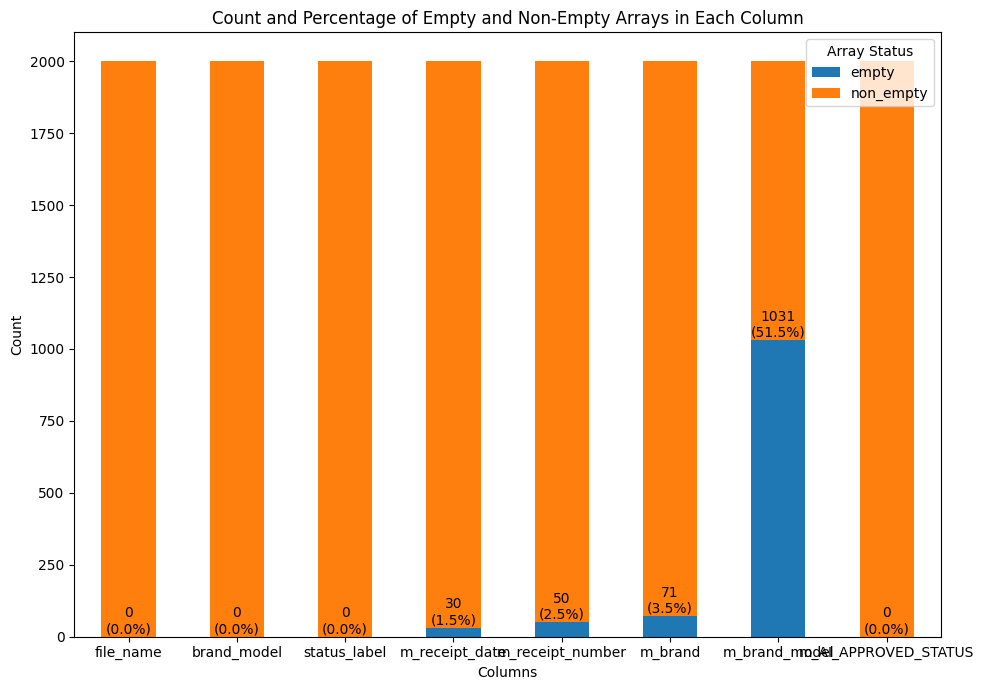

In [92]:
# Count empty and non-empty arrays
def count_empty_non_empty(df):
    counts = {'empty': {}, 'non_empty': {}}
    for column in df.columns:
        empty_count = df[column].apply(lambda x: len(x) == 0).sum()
        non_empty_count = len(df) - empty_count
        counts['empty'][column] = empty_count
        counts['non_empty'][column] = non_empty_count
    return counts

counts = count_empty_non_empty(subset_df)

# Convert counts to DataFrame
counts_df = pd.DataFrame(counts)

# Plotting the stacked bar chart
ax = counts_df.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count and Percentage of Empty and Non-Empty Arrays in Each Column')
plt.xticks(rotation=0)
plt.legend(title='Array Status', loc='upper right')

# Calculate and annotate percentages
total_records = len(subset_df)
for idx, column in enumerate(subset_df.columns):
    empty_count = counts['empty'][column]
    empty_percentage = (empty_count / total_records) * 100
    ax.annotate(f'{empty_count}\n({empty_percentage:.1f}%)',
                xy=(idx, empty_count + 1),
                ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/2d/pvchbzgd1s7c2jy60p9lpbn00000gn/T/ipykernel_40038/796881345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['ai_approver_status'] = subset_df.apply(


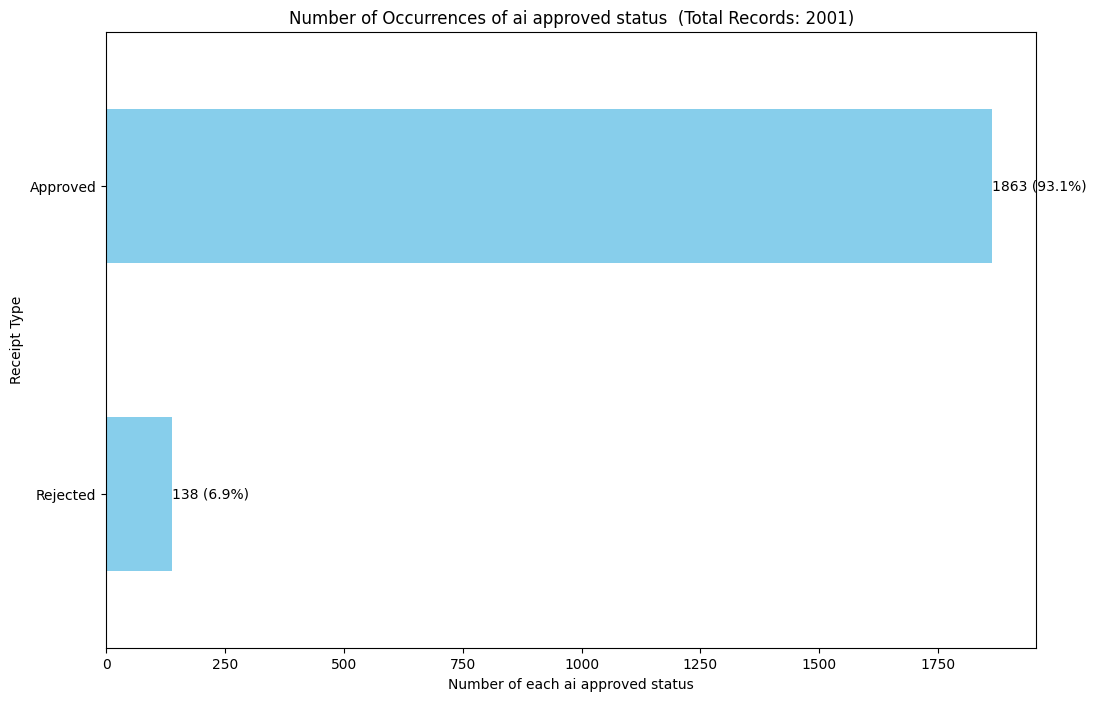

In [93]:
subset_df['ai_approver_status'] = subset_df.apply(
    lambda row: 'Approved' if row['m_receipt_date'] and row['m_receipt_number'] and row['m_brand'] else 'Rejected',
    axis=1
)

subset_df

# Count occurrences of each receipt_type
receipt_type_counts = subset_df['ai_approver_status'].value_counts()

# Calculate the total number of records
total_records = len(subset_df)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = receipt_type_counts.plot(kind='barh', color='skyblue')

# Annotate the bars with the count and percentage values
for bar in bars.patches:
    width = bar.get_width()
    percentage = (width / total_records) * 100
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width)} ({percentage:.1f}%)', 
             va='center', ha='left', fontsize=10, color='black')

# Set the title with total number of records
plt.xlabel('Number of each ai approved status')
plt.ylabel('Receipt Type')
plt.title(f'Number of Occurrences of ai approved status  (Total Records: {total_records})')
plt.gca().invert_yaxis()  # Optional: Invert y-axis to show the most frequent brand at the top
plt.show()

# introspection

In [56]:
target_df = subset_df[(subset_df['m_brand_model'].apply(lambda x: x == []) & (subset_df['m_AI_APPROVED_STATUS'] == 'Rejected'))]
target_df.to_csv(os.path.join(csv_folder, 'failed_brand_model.csv'))
target_df

,file_name,brand_model,status_label,m_receipt_date,m_receipt_number,m_brand,m_brand_model,m_AI_APPROVED_STATUS
28,alejvtpcmr.jpg,COASP5168,Approved,"[: 07/06/2024 07:10:11 PM, 07/06/2024, 07/06/2...",[],"[FF COACH, COACH]",[],Rejected
48,jpeg_20240904_135128.jpg,1129J,Approved,[],[],[],[],Rejected
152,zwww7pypqx.jpg,4423D,Rejected,"[04/09/2024 12:52:47 PM, : 04/09/2024 12:46:09...",[],[FS RAY BAN],[],Rejected
155,mmexport1725424821499.png,OOO9126F,Rejected,"[08/08/2024, Created on 08/08/2024 08:41:18 PM...","[CS011836, CS011836]",[],[],Rejected
159,img_20240904_125248_edit_11087219173113.jpg,OX8137,Approved,"[: 04/09/2024 12:45:03 PM, 04/09/2024, 04/09/2...",[],"[FF OAKLEY, OAKLEY]",[],Rejected
180,kwjbxo9buf.jpg,ORX7059D,Approved,"[: Aug 23, 2024, Friday, 23 August, 2024, 5:00...","[: BLO24-000543, BLO24-000543]",[],[],Rejected
236,jpeg_20240904_112826.jpg,sp4171F,Approved,"[03/09/2024 07:00:25 PM, : 03/09/2024 06:58:36...",[],[FS RAY BAN],[],Rejected
292,jpeg_20240904_105712.jpg,4428 664051,Approved,"[27/08/2024, 27/08/2024, 27/08/2024, 27/08/202...",[],"[RAYBAN 4428F COL 664051 SIZE 56 (CASE), RAYBAN]",[],Rejected
424,svv07yncev.jpg,MK4060U,Approved,[],"[S111601112773, S111601112773]",[FF MICHAEL KORS],[],Rejected
457,jpeg_20240903_210439.jpg,PRASPVRA13F118T10154,Approved,"[: 16/08/2024 10:02:05 PM, 16/08/2024, 16/08/2...",[],"[FF PRADA, PRADA]",[],Rejected
